In [1]:
import numpy as np

from scipy.fft import fft, fftfreq
import src.utility.utility_frequency_analysis as sDFT
import src.OnlineSLE.IIAI_synthetic as gensyn
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data1 = gensyn.generate_syn1(residual_rate=0.05, is_export=False)['ts'][:1800]
data21 = gensyn.generate_syn2(residual_rate=0.05, is_export=False)['ts'][:1800]
data22 = gensyn.generate_syn2(residual_rate=0.05, is_export=False)['ts'][1800:1800+1000]

ans1 = 100
ans2 = 50
ans3 = 80
results = []
for name, input_data, answer in zip(['syn1', 'syn2_1', 'syn2_2'], [data1, data21, data22], [ans1, ans2, ans3]):
    lb_window = int(3.5 * answer)
    ub_window = int(11 * answer)

    window_sizes = np.arange(lb_window, ub_window, 1)
    for window_size in window_sizes:
        buffer = input_data[:window_size]
        fft_x = fft(buffer)
        xfreq, periodogram_den = sDFT.peridogram(window_size, fft_x)
        location, peak_index = sDFT.get_period_hints(periodogram_den)
        quin_k_peak, quin_frequency_tone = sDFT.quin2_estimator(fft_x, peak_index, xfreq[1] - xfreq[0])
        qse_k_peak, qse_frequency_tone = sDFT.qse(buffer, peak_index, xfreq[1] - xfreq[0])
        haqse_k_peak, haqse_frequency_tone = sDFT.old_haqse(buffer, peak_index, xfreq[1] - xfreq[0])
        results.append({
            'answer': answer,
            'window_size': window_size,
            'pattern': name,
            'algorithm': 'OnlineSLE-none',
            'raw': 1 / xfreq[peak_index],
            'round': np.round(1 / xfreq[peak_index]),
        })
        results.append({
            'answer': answer,
            'window_size': window_size,
            'pattern': name,
            'algorithm': 'OnlineSLE-Quinn',
            'raw': 1 / quin_frequency_tone,
            'round': np.round(1 / quin_frequency_tone)
        })
        results.append({
            'answer': answer,
            'window_size': window_size,
            'pattern': name,
            'algorithm': 'OnlineSLE-QSE',
            'raw': 1 / qse_frequency_tone,
            'round': np.round(1 / qse_frequency_tone)
        })
        results.append({
            'answer': answer,
            'window_size': window_size,
            'pattern': name,
            'algorithm': 'OnlineSLE-HAQSE',
            'raw': 1 / haqse_frequency_tone,
            'round': np.round(1 / haqse_frequency_tone)
        })

df_results = pd.DataFrame(results)


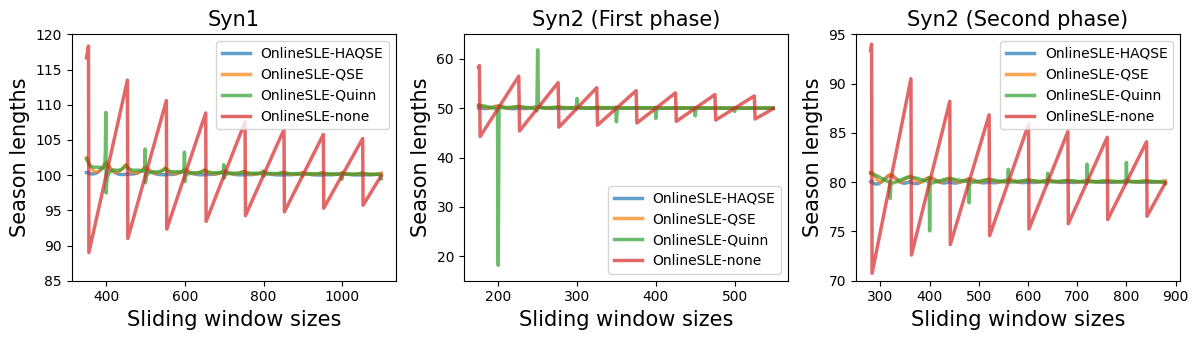

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3.5))
filtered_df = df_results[(df_results['pattern'] == 'syn1')]
for name, group in filtered_df.groupby('algorithm'):
    axs[0].plot(group['window_size'], group['raw'], label=name, linewidth=2.5, alpha = 0.7)

axs[0].set_title('Syn1', fontsize=15)
axs[0].set_xlabel('Sliding window sizes', fontsize=15)
axs[0].set_ylabel('Season lengths', fontsize=15)
axs[0].set_ylim(85,120)
axs[0].legend()

filtered_df = df_results[(df_results['pattern'] == 'syn2_1')]
for name, group in filtered_df.groupby('algorithm'):
    axs[1].plot(group['window_size'], group['raw'], label=name, linewidth=2.5, alpha = 0.7)

axs[1].set_title('Syn2 (First phase)', fontsize=15)
axs[1].set_xlabel('Sliding window sizes', fontsize=15)
axs[1].set_ylabel('Season lengths', fontsize=15)
axs[1].set_ylim(15,65)
axs[1].legend()

filtered_df = df_results[(df_results['pattern'] == 'syn2_2')]
for name, group in filtered_df.groupby('algorithm'):
    axs[2].plot(group['window_size'], group['raw'], label=name, linewidth=2.5, alpha = 0.7)

axs[2].set_title('Syn2 (Second phase)', fontsize=15)
axs[2].set_xlabel('Sliding window sizes', fontsize=15)
axs[2].set_ylabel('Season lengths', fontsize=15)
axs[2].set_ylim(70,95)
axs[2].legend()

plt.tight_layout()
plt.show()

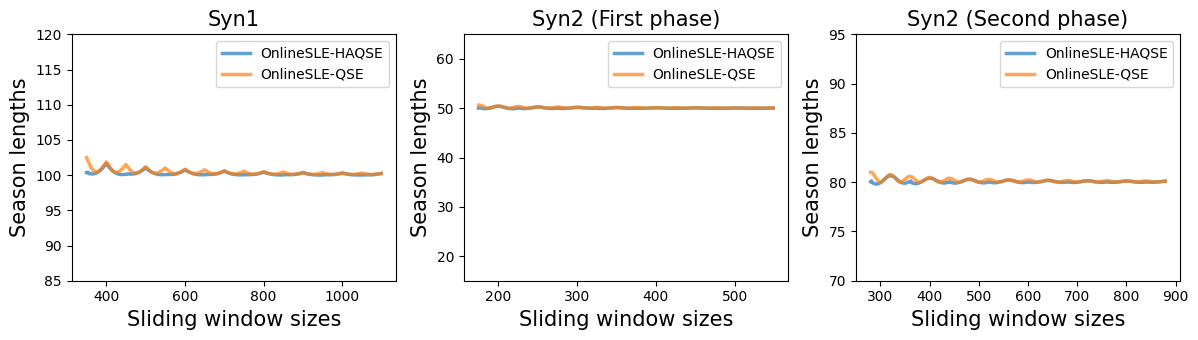

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3.5))
filtered_df = df_results[(df_results['pattern'] == 'syn1')& (df_results['algorithm'].isin(['OnlineSLE-QSE', 'OnlineSLE-HAQSE']))]
for name, group in filtered_df.groupby('algorithm'):
    axs[0].plot(group['window_size'], group['raw'], label=name, linewidth=2.5, alpha = 0.7)

axs[0].set_title('Syn1', fontsize=15)
axs[0].set_xlabel('Sliding window sizes', fontsize=15)
axs[0].set_ylabel('Season lengths', fontsize=15)
axs[0].set_ylim(85,120)
axs[0].legend()

filtered_df = df_results[(df_results['pattern'] == 'syn2_1')&(df_results['algorithm'].isin(['OnlineSLE-QSE', 'OnlineSLE-HAQSE']))]
for name, group in filtered_df.groupby('algorithm'):
    axs[1].plot(group['window_size'], group['raw'], label=name, linewidth=2.5, alpha = 0.7)

axs[1].set_title('Syn2 (First phase)', fontsize=15)
axs[1].set_xlabel('Sliding window sizes', fontsize=15)
axs[1].set_ylabel('Season lengths', fontsize=15)
axs[1].set_ylim(15,65)
axs[1].legend()

filtered_df = df_results[(df_results['pattern'] == 'syn2_2')&(df_results['algorithm'].isin(['OnlineSLE-QSE', 'OnlineSLE-HAQSE']))]
for name, group in filtered_df.groupby('algorithm'):
    axs[2].plot(group['window_size'], group['raw'], label=name, linewidth=2.5, alpha = 0.7)

axs[2].set_title('Syn2 (Second phase)', fontsize=15)
axs[2].set_xlabel('Sliding window sizes', fontsize=15)
axs[2].set_ylabel('Season lengths', fontsize=15)
axs[2].set_ylim(70,95)
axs[2].legend()

plt.tight_layout()
plt.show()